# **Sentiment Analysis on Tweets**
Sentiment analysis, also known as opinion mining, is the process of identifying and categorizing emotions expressed in text data—typically as positive, negative, or neutral. It helps organizations and individuals understand the sentiment behind user-generated content, such as product reviews, social media posts, or customer feedback.

In the context of social media, sentiment analysis is particularly valuable due to the vast amount of real-time user opinions shared daily. Twitter, with its concise and public messages, provides an ideal dataset for analyzing public sentiment around topics, events, brands, or products.

By leveraging natural language processing (NLP) techniques and machine learning models, sentiment analysis can extract insights from tweets to support business decisions, brand monitoring, political analysis, and crisis management.

This project focuses on building a sentiment classifier using a dataset of tweets. The model aims to classify each tweet as positive or negative, helping reveal how people feel about certain topics at scale.

<br>

**Dataset:** [Kaggle Sentiment140](https://www.kaggle.com/datasets/kazanova/sentiment140/data)

---

## **Data Preprocessing**

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
import emoji

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.model_selection import train_test_split

nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Juls\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Juls\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Juls\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Juls\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Juls\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Prepare the dataset.

In [18]:
dataset_path = '../data/twt.csv'
column_names = ['sentiment', 'id', 'date', 'flag', 'user', 'text']
df = pd.read_csv(dataset_path, encoding='latin', delimiter=',', names=column_names)
df.head()

,sentiment,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


Drop unimportant columns and missing values.

In [19]:
df = df.drop(['id', 'date', 'flag', 'user'], axis=1)
df = df.dropna()
df.head()

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


### Preprocess the data:
- convert the emojis into text
- lowercase everything
- remove urls, mentions and hashtags
- remove punctuations and special characters
- remove stopwords
- split into tokens

In [20]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [21]:
def clean_twts(twt):
    twt = twt.lower()
    twt = re.sub(r"http\S+|www\S+|https\S+", '', twt)  # Remove URLs
    twt = re.sub(r"@\w+", '', twt)  # Remove mentions
    twt = re.sub(r"#", '', twt)  # Remove hashtag symbol
    twt = emoji.replace_emoji(twt, replace='')  # Remove emojis
    twt = re.sub(r"[^a-zA-Z\s]", '', twt)  # Remove punctuation
    twt = re.sub(r"\s+", ' ', twt).strip()  # Clean whitespace
    
    tokens = twt.split()
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]  # Filter short words
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatize
    
    return ' '.join(tokens)

cleaned_twts = df['text'].apply(clean_twts)
df['cleaned_text'] = cleaned_twts

In [22]:
# def clean_twts(twt):
#     twt = twt.lower()  # Lowercase
#     twt = re.sub(r"http\S+|www\S+|https\S+", '', twt)  # Remove URLs
#     twt = re.sub(r"@\w+", '', twt)  # Remove mentions
#     twt = re.sub(r"#", '', twt)  # Remove hashtag symbol, keep the word
#     twt = emoji.demojize(twt)  # Convert emojis to text
#     twt = re.sub(r"[^a-zA-Z\s]", '', twt)  # Remove punctuations and special characters
#     twt = re.sub(r"\s+", ' ', twt).strip()  # Remove extra spaces
#     tokens = twt.split()  # Tokenize
#     tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
#     tokens = [stemmer.stem(word) for word in tokens]  # Stem words
    
#     return ' '.join(tokens)

# cleaned_twts = df['text'].apply(clean_twts)
# df['cleaned_text'] = cleaned_twts

In [23]:
df.head()

,sentiment,text,cleaned_text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",thats bummer shoulda got david carr third day
1,0,is upset that he can't update his Facebook by ...,upset cant update facebook texting might cry r...
2,0,@Kenichan I dived many times for the ball. Man...,dived many time ball managed save rest bound
3,0,my whole body feels itchy and like its on fire,whole body feel itchy like fire
4,0,"@nationwideclass no, it's not behaving at all....",behaving mad cant see


In [26]:
# Check average tweet length after preprocessing
lengths = [len(text.split()) for text in cleaned_twts]
print(f"Average length: {np.mean(lengths):.2f}")
print(f"95th percentile: {np.percentile(lengths, 95):.2f}")

Average length: 6.71
95th percentile: 13.00


Tokenize the data.

In [27]:
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(cleaned_twts)
sequences = tokenizer.texts_to_sequences(cleaned_twts)
padded_sequences = pad_sequences(sequences, maxlen=20, padding='post', truncating='post')

print("Tokenized and padded sequences:")
print(padded_sequences)

Tokenized and padded sequences:
[[  41 1010 3034 ...    0    0    0]
 [ 606   12  276 ...    0    0    0]
 [   1  205   11 ...    0    0    0]
 ...
 [ 119 6705 6490 ...    0    0    0]
 [  53  164  378 ...    0    0    0]
 [  53    1    0 ...    0    0    0]]


Add into the dataframe.

In [28]:
df['padded_text'] = list(padded_sequences)
df['sentiment'] = df['sentiment'].map({4: 1, 0: 0})
df.head()

,sentiment,text,cleaned_text,padded_text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",thats bummer shoulda got david carr third day,"[41, 1010, 3034, 13, 671, 8481, 1622, 2, 0, 0,..."
1,0,is upset that he can't update his Facebook by ...,upset cant update facebook texting might cry r...,"[606, 12, 276, 421, 1779, 184, 272, 944, 75, 9..."
2,0,@Kenichan I dived many times for the ball. Man...,dived many time ball managed save rest bound,"[1, 205, 11, 818, 1412, 710, 345, 2790, 0, 0, ..."
3,0,my whole body feels itchy and like its on fire,whole body feel itchy like fire,"[309, 631, 33, 2553, 5, 948, 0, 0, 0, 0, 0, 0,..."
4,0,"@nationwideclass no, it's not behaving at all....",behaving mad cant see,"[8997, 460, 12, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


Split the dataset.

In [29]:
x = padded_sequences
y = df['sentiment']


x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.4, random_state=42)

x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

model = Sequential([
    Embedding(input_dim=10000, output_dim=64),
    LSTM(64, return_sequences=False),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [39]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.build(input_shape=(None,20))

In [40]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 20, 64)         │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 675,137 (2.58 MB)

 Trainable params: 675,137 (2.58 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
history = model.fit(
    x_train, y_train,
    epochs=12,
    batch_size=32,
    validation_data=(x_val, y_val)
)

Epoch 1/12
30000/30000 ━━━━━━━━━━━━━━━━━━━━ 250s 8ms/step - accuracy: 0.7561 - loss: 0.4958 - val_accuracy: 0.7883 - val_loss: 0.4496
Epoch 2/12
30000/30000 ━━━━━━━━━━━━━━━━━━━━ 303s 10ms/step - accuracy: 0.7953 - loss: 0.4385 - val_accuracy: 0.7911 - val_loss: 0.4423
Epoch 3/12
30000/30000 ━━━━━━━━━━━━━━━━━━━━ 266s 9ms/step - accuracy: 0.8036 - loss: 0.4234 - val_accuracy: 0.7925 - val_loss: 0.4437
Epoch 4/12
30000/30000 ━━━━━━━━━━━━━━━━━━━━ 283s 9ms/step - accuracy: 0.8114 - loss: 0.4092 - val_accuracy: 0.7924 - val_loss: 0.4435
Epoch 5/12
30000/30000 ━━━━━━━━━━━━━━━━━━━━ 280s 9ms/step - accuracy: 0.8192 - loss: 0.3958 - val_accuracy: 0.7911 - val_loss: 0.4492
Epoch 6/12
30000/30000 ━━━━━━━━━━━━━━━━━━━━ 280s 9ms/step - accuracy: 0.8266 - loss: 0.3822 - val_accuracy: 0.7887 - val_loss: 0.4517
Epoch 7/12
30000/30000 ━━━━━━━━━━━━━━━━━━━━ 280s 9ms/step - accuracy: 0.8338 - loss: 0.3690 - val_accuracy: 0.7874 - val_loss: 0.4647
Epoch 8/12
30000/30000 ━━━━━━━━━━━━━━━━━━━━ 282s 9ms/step - a

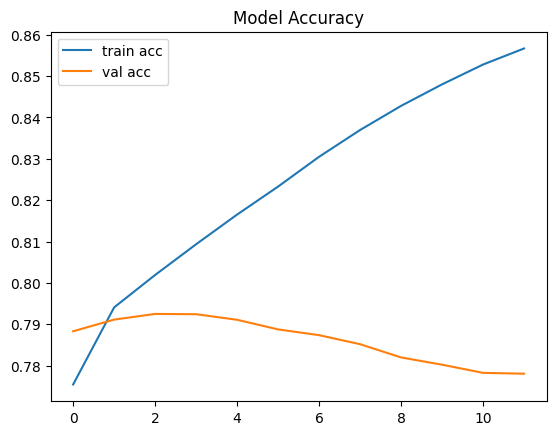

In [42]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title("Model Accuracy")
plt.show()

In [46]:
preds = model.predict(x_test)
preds_binary = (preds > 0.5).astype(int).flatten()

10000/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 3ms/step


In [47]:
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:")
print(classification_report(y_test, preds_binary))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, preds_binary))

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.78      0.78    159790
           1       0.78      0.78      0.78    160210

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000


Confusion Matrix:
[[124682  35108]
 [ 35984 124226]]


In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print(f"\nAccuracy: {accuracy_score(y_test, preds_binary):.4f}")
print(f"Precision: {precision_score(y_test, preds_binary):.4f}")
print(f"Recall: {recall_score(y_test, preds_binary):.4f}")
print(f"F1-Score: {f1_score(y_test, preds_binary):.4f}")


Accuracy: 0.7778
Precision: 0.7797
Recall: 0.7754
F1-Score: 0.7775


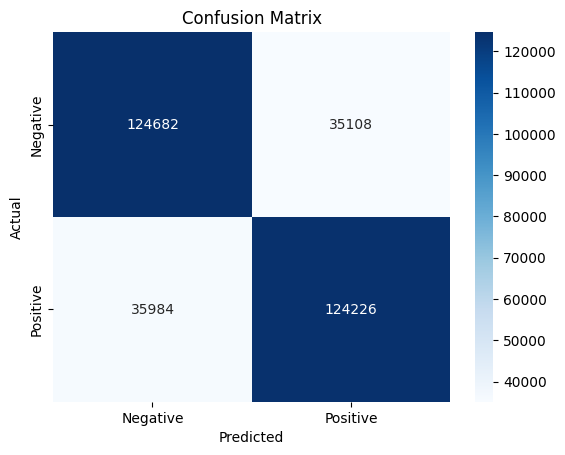

In [49]:
cm = confusion_matrix(y_test, preds_binary)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Initial training results: the model can be improved. Will try again.  
Second attempt: model improved slightly. Will try again.  
Third attempt: tried adding more epochs and batches. Will try again.  
Fourth attempt: used lemmatization, better results. Will try again.